In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory

# Initialize rng
rng = np.random.default_rng(2022)

In [ ]:
batch_size = 16 # This is a tunable hyperparameter, I am reducing this to lower computing time.
shape = (128, 128) # note we are reducing the size of the image
# Note: you will use 'grayscale' images for your own model
# but you might need to switch to 'rgb' for pretrained models because they are trained on ImageNet which has only RGB images
data_dir = '/content/drive/MyDrive/HW2/split_archive/' #You will certainly need to change the location of the dataset if you are attempting to run this from github
os.listdir(data_dir)

train_ds = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'train'),
                                                       seed=rng.integers(500000),
                                                       image_size=shape,
                                                       color_mode='rgb', batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'val'),
                                                     seed=rng.integers(500000),
                                                     image_size=shape,
                                                     color_mode='rgb',
                                                     batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'test'),
                                                      seed=rng.integers(500000),
                                                      image_size=shape,
                                                      color_mode='rgb',
                                                      batch_size=batch_size)

Found 3924 files belonging to 2 classes.
Found 841 files belonging to 2 classes.
Found 841 files belonging to 2 classes.


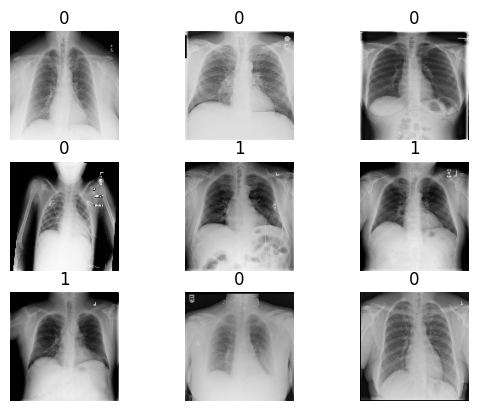

In [ ]:
# plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
for x,y in train_ds.take(1):
  print(x.shape)
  print(y.shape)

(16, 128, 128, 3)
(16,)


In [ ]:
# Sample usage of datasets for a model
# model.fit(train_ds, validation_data=val_ds, ...)

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
  fig, ax = plt.subplots(1,2, figsize=(20, 10))
  # plot loss
  ax[0].set_title('Loss Curves', fontsize=20)
  ax[0].plot(history.history['loss'], label='train')
  ax[0].plot(history.history['val_loss'], label='validation')
  ax[0].set_xlabel('Epochs', fontsize=15)
  ax[0].set_ylabel('Loss', fontsize=15)
  ax[0].legend(fontsize=15)
  # plot accuracy
  ax[1].set_title('Classification Accuracy', fontsize=20)
  ax[1].plot(history.history['accuracy'], label='train')
  ax[1].plot(history.history['val_accuracy'], label='validation')
  ax[1].set_xlabel('Epochs', fontsize=15)
  ax[1].set_ylabel('Accuracy', fontsize=15)
  ax[1].legend(fontsize=15)

# Start your solution below

# Architecture 1

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt

possible_activations = ["linear", "sigmoid", "relu", "tanh"]
possible_padding = ["valid", "same"]
possible_lr = [1e-2, 1e-3, 1e-4, 1e-5]
possible_dropout = [0.1, 0.2, 0.3, 0.4, 0.5]

# batch size, learning rate, filter size, dropout rate
# define a CNN architecture
def Actitecture_One_CNN_Train(hp):

  size = (128, 128, 1)
  inputs = Input(shape=size)
  #TODO DETERMINE FILTER SIZE

  filters1=hp.Int('filters1', min_value=16, max_value=64, step=4)
  filters2=hp.Int('filters2', min_value=16, max_value=64, step=4)
  filters3=hp.Int('filters3', min_value=16, max_value=64, step=4)
  filters4=hp.Int('filters4', min_value=16, max_value=64, step=4)
  filters5=hp.Int('filters5', min_value=16, max_value=64, step=4)
  filters6=hp.Int('filters6', min_value=16, max_value=64, step=4)

  batch_size=hp.Int('batch_size', min_value=8, max_value=32, step=4)

  hp_activation1 = hp.Choice('activation1', values=possible_activations)
  hp_activation2 = hp.Choice('activation2', values=possible_activations)
  hp_activation3 = hp.Choice('activation3', values=possible_activations)
  hp_activation4 = hp.Choice('activation4', values=possible_activations)
  hp_activation5 = hp.Choice('activation5', values=possible_activations)
  hp_activation6 = hp.Choice('activation6', values=possible_activations)

  hp_padding1 = hp.Choice('hp_padding1', values=possible_padding)
  hp_padding2 = hp.Choice('hp_padding2', values=possible_padding)
  hp_padding3 = hp.Choice('hp_padding3', values=possible_padding)
  hp_padding4 = hp.Choice('hp_padding4', values=possible_padding)
  hp_padding5 = hp.Choice('hp_padding5', values=possible_padding)
  hp_padding6 = hp.Choice('hp_padding6', values=possible_padding)

  hp_dropout_rate1 = hp.Choice('dropout_rate1', values=possible_dropout)
  hp_dropout_rate2 = hp.Choice('dropout_rate2', values=possible_dropout)
  hp_dropout_rate3 = hp.Choice('dropout_rate3', values=possible_dropout)

  hp_learning_rate = hp.Choice('learning_rate', values=possible_lr)

  conv1 = Conv2D(filters1, kernel_size=(3,3), activation=hp_activation1, padding=hp_padding1, input_shape=size)((inputs))
  conv1 = MaxPooling2D((2, 2))(conv1)

  conv2 = Conv2D(filters2, kernel_size=(3,3), activation=hp_activation2, padding=hp_padding2)(conv1)
  conv2 = Dropout(hp_dropout_rate1)(conv2)

  conv3 = Conv2D(filters3, kernel_size=(3,3), activation=hp_activation3, padding=hp_padding3)(conv2)
  conv3 = MaxPooling2D((2, 2))(conv3)

  conv4 = Conv2D(filters4, kernel_size=(3,3), activation=hp_activation4, padding=hp_padding4)(conv3)
  conv4 = Dropout(hp_dropout_rate2)(conv1)

  conv5 = Conv2D(filters5, kernel_size=(3,3), activation=hp_activation5, padding=hp_padding5)(conv4)
  conv5 = MaxPooling2D((2, 2))(conv5)

  conv6 = Conv2D(filters6, kernel_size=(3,3), activation=hp_activation6, padding=hp_padding6)(conv5)
  conv6 = Dropout(hp_dropout_rate3)(conv6)

  hp_learning_rate = hp.Choice('learning_rate', values=possible_lr)

  flatten1 = Flatten()(conv6)
  outputs = Dense(1, activation='sigmoid')(flatten1)
  model = Model(inputs, outputs)
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model


In [ ]:
  tuner = kt.RandomSearch(Actitecture_One_CNN_Train,
                      objective='val_accuracy',
                      directory='my_dir',
                      overwrite=True,
                      max_trials = 10)

In [ ]:
# Early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=0,
                   patience=20,
                   restore_best_weights=True)

tuner.search(train_ds,
             epochs=10,
             validation_data=val_ds,
             callbacks=[es])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 2 Complete [00h 00m 00s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
36                |24                |filters1
48                |36                |filters2
20                |56                |filters3
40                |36                |filters4
52                |48                |filters5
40                |32                |filters6
12                |8                 |batch_size
sigmoid           |tanh              |activation1
tanh              |sigmoid           |activation2
relu              |relu              |activation3
tanh              |tanh              |activation4
sigmoid           |tanh              |activation5
relu              |sigmoid           |activation6
valid             |valid             |hp_padding1
valid             |valid             |hp_padding2
valid             |same              |hp_padding3
same              |valid             |hp_pad

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, i

RuntimeError: ignored

In [ ]:
print(
    best_hps.get('filters1'),
    best_hps.get('filters2'),
    best_hps.get('filters3'),
    best_hps.get('filters4'),
    best_hps.get('filters5'),
    best_hps.get('filters6'),
)
print(
    best_hps.get('batch_size'),
)
print(
    best_hps.get('activation1'),
    best_hps.get('activation2'),
    best_hps.get('activation3'),
    best_hps.get('activation4'),
    best_hps.get('activation5'),
    best_hps.get('activation6'),
    )
print(
    best_hps.get('hp_padding1'),
    best_hps.get('hp_padding2'),
    best_hps.get('hp_padding3'),
    best_hps.get('hp_padding4'),
    best_hps.get('hp_padding5'),
    best_hps.get('hp_padding6'),
    )
print(
    best_hps.get('dropout_rate1'),
    best_hps.get('dropout_rate2'),
    best_hps.get('dropout_rate3'),
    )
print(
    best_hps.get('learning_rate')
    )

In [ ]:
# define a CNN architecture
def Actitecture_One_CNN():
  size = (128, 128, 1)
  inputs = Input(shape=size)
  #TODO DETERMINE FILTER SIZE

  filters1=48
  filters2=52
  filters3=44
  filters4=40
  filters5=28
  filters6=20

  batch_size=20

  hp_activation1 = "sigmoid"
  hp_activation2 = "tanh"
  hp_activation3 = "relu"
  hp_activation4 = "tanh"
  hp_activation5 = "tanh"
  hp_activation6 = "linear"

  hp_padding1 = "valid"
  hp_padding2 = "same"
  hp_padding3 = "same"
  hp_padding4 = "same"
  hp_padding5 = "same"
  hp_padding6 = "same"

  hp_dropout_rate1 = 0.2
  hp_dropout_rate2 = 0.3
  hp_dropout_rate3 = 0.3

  hp_learning_rate = 0.001

  conv1 = Conv2D(filters1, kernel_size=(3,3), activation=hp_activation1, padding=hp_padding1, input_shape=size)((inputs))
  conv1 = MaxPooling2D((2, 2))(conv1)

  conv2 = Conv2D(filters2, kernel_size=(3,3), activation=hp_activation2, padding=hp_padding2)(conv1)
  conv2 = Dropout(hp_dropout_rate1)(conv2)

  conv3 = Conv2D(filters3, kernel_size=(3,3), activation=hp_activation3, padding=hp_padding3)(conv2)
  conv3 = MaxPooling2D((2, 2))(conv3)

  conv4 = Conv2D(filters4, kernel_size=(3,3), activation=hp_activation4, padding=hp_padding4)(conv3)
  conv4 = Dropout(hp_dropout_rate2)(conv1)

  conv5 = Conv2D(filters5, kernel_size=(3,3), activation=hp_activation5, padding=hp_padding5)(conv4)
  conv5 = MaxPooling2D((2, 2))(conv5)

  conv6 = Conv2D(filters6, kernel_size=(3,3), activation=hp_activation6, padding=hp_padding6)(conv5)
  conv6 = Dropout(hp_dropout_rate3)(conv6)


  flatten1 = Flatten()(conv6)
  outputs = Dense(1, activation='sigmoid')(flatten1)
  model = Model(inputs, outputs)
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import auc, roc_curve

def evaluate_model(model, dataset):
    y_pred_proba = []
    y_true = []

  # for x, y in dataset:
  #     y_pred_class.append(np.argmax(model(x), axis=-1)) # Use this line to get predicted class labels
  #     y_pred.append(model(x)) # Use this line to get model predictions as probabilities
  #     labels.append(np.argmax(y.numpy(), axis=-1))
  #     labels_one_hot.append(y.numpy())

    for x, y in dataset:
      y_pred_proba.append(model(x).numpy())  # Get model predictions as probabilities
      y_true.append(y.numpy())  # True labels

    predictions = np.concatenate(y_pred_proba, axis=0)
    true_labels = np.concatenate(y_true, axis=0)
    pred_classes = (predictions > 0.5).astype(int)

    acc = accuracy_score(true_labels, pred_classes)
    roc_auc = roc_auc_score(true_labels, predictions)

    return predictions, true_labels, acc, roc_auc


In [ ]:
model_one = Actitecture_One_CNN()

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=10,
                   restore_best_weights=True)

history = model_one.fit(train_ds,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=val_ds,
                    callbacks=[es],
                    verbose=1)

NameError: ignored

In [ ]:
model_one.summary()

In [ ]:
summarize_diagnostics(history)

In [ ]:
predictions, gt_labels, test_acc, test_roc_auc = evaluate_model(model_one, test_ds)

print("Test accuracy:", test_acc)
print("Test ROC AUC:", test_roc_auc)


NameError: ignored

In [ ]:
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(gt_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.plot(fpr["micro"], tpr["micro"]);
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");

# Architecture 2


In [ ]:
# batch size, learning rate, filter size, dropout rate
# define a CNN architecture
def Actitecture_Two_CNN_Train(hp):
  # batch_size=32
  size = (128, 128, 1)
  inputs = Input(shape=size)
  #TODO DETERMINE FILTER SIZE

  filters1=hp.Int('filters1', min_value=16, max_value=64, step=4)
  filters2=hp.Int('filters2', min_value=16, max_value=64, step=4)
  filters3=hp.Int('filters3', min_value=16, max_value=64, step=4)
  filters4=hp.Int('filters4', min_value=16, max_value=64, step=4)
  filters5=hp.Int('filters5', min_value=16, max_value=64, step=4)
  filters6=hp.Int('filters6', min_value=16, max_value=64, step=4)

  hp_activation1 = hp.Choice('activation1', values=possible_activations)
  hp_activation2 = hp.Choice('activation2', values=possible_activations)
  hp_activation3 = hp.Choice('activation3', values=possible_activations)
  hp_activation4 = hp.Choice('activation4', values=possible_activations)
  hp_activation5 = hp.Choice('activation5', values=possible_activations)
  hp_activation6 = hp.Choice('activation6', values=possible_activations)

  hp_padding1 = hp.Choice('hp_padding1', values=possible_padding)
  hp_padding2 = hp.Choice('hp_padding2', values=possible_padding)
  hp_padding3 = hp.Choice('hp_padding3', values=possible_padding)
  hp_padding4 = hp.Choice('hp_padding4', values=possible_padding)
  hp_padding5 = hp.Choice('hp_padding5', values=possible_padding)
  hp_padding6 = hp.Choice('hp_padding6', values=possible_padding)

  hp_dropout_rate1 = hp.Choice('dropout_rate1', values=possible_dropout)
  hp_dropout_rate2 = hp.Choice('dropout_rate2', values=possible_dropout)
  hp_dropout_rate3 = hp.Choice('dropout_rate3', values=possible_dropout)
  hp_dropout_rate4 = hp.Choice('dropout_rate4', values=possible_dropout)
  hp_dropout_rate5 = hp.Choice('dropout_rate5', values=possible_dropout)
  hp_dropout_rate6 = hp.Choice('dropout_rate6', values=possible_dropout)

  hp_learning_rate = hp.Choice('learning_rate', values=possible_lr)

  conv1 = Conv2D(filters1, kernel_size=(3,3), activation=hp_activation1, padding=hp_padding1, input_shape=size)((inputs))
  conv1 = MaxPooling2D((2, 2))(conv1)
  conv1 = Dropout(hp_dropout_rate1)(conv1)

  conv2 = Conv2D(filters2, kernel_size=(3,3), activation=hp_activation2, padding=hp_padding2)(conv1)
  conv2 = MaxPooling2D((2, 2))(conv2)
  conv2 = Dropout(hp_dropout_rate2)(conv2)

  conv3 = Conv2D(filters3, kernel_size=(3,3), activation=hp_activation3, padding=hp_padding3)(conv2)
  conv3 = MaxPooling2D((2, 2))(conv3)
  conv3 = Dropout(hp_dropout_rate3)(conv3)

  conv4 = Conv2D(filters4, kernel_size=(3,3), activation=hp_activation4, padding=hp_padding4)(conv3)
  # conv4 = MaxPooling2D((2, 2))(conv4)
  conv4 = Dropout(hp_dropout_rate4)(conv4)

  conv5 = Conv2D(filters5, kernel_size=(3,3), activation=hp_activation5, padding=hp_padding5)(conv4)
  conv5 = MaxPooling2D((2, 2))(conv5)
  conv5 = Dropout(hp_dropout_rate5)(conv5)

  conv6 = Conv2D(filters6, kernel_size=(3,3), activation=hp_activation6, padding=hp_padding6)(conv5)
  conv6 = MaxPooling2D((2, 2))(conv6)
  conv6 = Dropout(hp_dropout_rate6)(conv6)

  hp_learning_rate = hp.Choice('learning_rate', values=possible_lr)

  flatten1 = Flatten()(conv6)
  outputs = Dense(1, activation='sigmoid')(flatten1)
  model = Model(inputs, outputs)
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(Actitecture_Two_CNN_Train,
                    objective='val_accuracy',
                    directory='my_dir',
                    overwrite=True,
                    max_trials = 10)


In [ ]:
# Early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=0,
                   patience=5,
                   restore_best_weights=True)

tuner.search(train_ds,
             epochs=10,
             validation_data=val_ds,
             callbacks=[es])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 2 Complete [00h 00m 00s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
36                |48                |filters1
60                |16                |filters2
44                |36                |filters3
52                |28                |filters4
32                |60                |filters5
24                |32                |filters6
sigmoid           |relu              |activation1
sigmoid           |linear            |activation2
linear            |sigmoid           |activation3
relu              |linear            |activation4
linear            |tanh              |activation5
tanh              |relu              |activation6
same              |same              |hp_padding1
same              |valid             |hp_padding2
same              |same              |hp_padding3
valid             |valid             |hp_padding4
valid             |same              |hp_pa

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, i

RuntimeError: ignored

In [ ]:
print(
    best_hps.get('filters1'),
    best_hps.get('filters2'),
    best_hps.get('filters3'),
    best_hps.get('filters4'),
    best_hps.get('filters5'),
    best_hps.get('filters6'),
)

print(
    best_hps.get('activation1'),
    best_hps.get('activation2'),
    best_hps.get('activation3'),
    best_hps.get('activation4'),
    best_hps.get('activation5'),
    best_hps.get('activation6'),
    )
print(
    best_hps.get('hp_padding1'),
    best_hps.get('hp_padding2'),
    best_hps.get('hp_padding3'),
    best_hps.get('hp_padding4'),
    best_hps.get('hp_padding5'),
    best_hps.get('hp_padding6'),
    )
print(
    best_hps.get('dropout_rate1'),
    best_hps.get('dropout_rate2'),
    best_hps.get('dropout_rate3'),
    best_hps.get('dropout_rate4'),
    best_hps.get('dropout_rate5'),
    best_hps.get('dropout_rate6'),
    )
print(
    best_hps.get('learning_rate')
    )

In [ ]:
# batch size, learning rate, filter size, dropout rate
# define a CNN architecture
def Actitecture_Two_CNN():
  # batch_size=32
  size = (128, 128, 1)
  inputs = Input(shape=size)
  #TODO DETERMINE FILTER SIZE

  filters1=24
  filters2=60
  filters3=64
  filters4=60
  filters5=20
  filters6=52

  hp_activation1 ="relu"
  hp_activation2 ="sigmoid"
  hp_activation3 ="tanh"
  hp_activation4 ="tanh"
  hp_activation5 ="linear"
  hp_activation6 ="tanh"

  hp_padding1 = "same"
  hp_padding2 = "same"
  hp_padding3 = "same"
  hp_padding4 = "same"
  hp_padding5 = "same"
  hp_padding6 = "valid"

  hp_dropout_rate1 = 0.3
  hp_dropout_rate2 = 0.1
  hp_dropout_rate3 = 0.5
  hp_dropout_rate4 = 0.4
  hp_dropout_rate5 = 0.4
  hp_dropout_rate6 = 0.5

  conv1 = Conv2D(filters1, kernel_size=(3,3), activation=hp_activation1, padding=hp_padding1, input_shape=size)((inputs))
  conv1 = MaxPooling2D((2, 2))(conv1)
  conv1 = Dropout(hp_dropout_rate1)(conv1)

  conv2 = Conv2D(filters2, kernel_size=(3,3), activation=hp_activation2, padding=hp_padding2)(conv1)
  conv2 = MaxPooling2D((2, 2))(conv2)
  conv2 = Dropout(hp_dropout_rate2)(conv2)

  conv3 = Conv2D(filters3, kernel_size=(3,3), activation=hp_activation3, padding=hp_padding3)(conv2)
  conv3 = MaxPooling2D((2, 2))(conv3)
  conv3 = Dropout(hp_dropout_rate3)(conv3)

  conv4 = Conv2D(filters4, kernel_size=(3,3), activation=hp_activation4, padding=hp_padding4)(conv3)
  # conv4 = MaxPooling2D((2, 2))(conv4)
  conv4 = Dropout(hp_dropout_rate4)(conv4)

  conv5 = Conv2D(filters5, kernel_size=(3,3), activation=hp_activation5, padding=hp_padding5)(conv4)
  conv5 = MaxPooling2D((2, 2))(conv5)
  conv5 = Dropout(hp_dropout_rate5)(conv5)

  conv6 = Conv2D(filters6, kernel_size=(3,3), activation=hp_activation6, padding=hp_padding6)(conv5)
  conv6 = MaxPooling2D((2, 2))(conv6)
  conv6 = Dropout(hp_dropout_rate6)(conv6)

  hp_learning_rate = 1e-05

  flatten1 = Flatten()(conv6)
  outputs = Dense(1, activation='sigmoid')(flatten1)
  model = Model(inputs, outputs)
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model_two = Actitecture_Two_CNN()

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=10,
                   restore_best_weights=True)

history = model_two.fit(train_ds,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=val_ds,
                    callbacks=[es],
                    verbose=1)

In [ ]:
model_two.summary()

In [ ]:
summarize_diagnostics(history)

In [ ]:
predictions, gt_labels, test_acc, test_roc_auc = evaluate_model(model_two, test_ds)

print("Test accuracy:", test_acc)
print("Test ROC AUC:", test_roc_auc)


In [ ]:
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(gt_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.plot(fpr["micro"], tpr["micro"]);
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");

## I believe that the first architexture was great, and had high accuracy compared to models in HW1.

##It took several hours to train.

##The second architecture performed the same throughout all training, and hypertuning took about half the time than that of arch #1.

##I believe Arch 1 performed better because it had less options to hypertune and was able to converge easier


#Part 2
## Student ID: nm67
## 7: RegNetY320

In [ ]:
from tensorflow.keras.applications import regnet

# batch size, learning rate, filter size, dropout rate
# define a CNN architecture
def RegNetY320_Example():
  # batch_size=32
  size = (128, 128, 3)

  RNY320 = regnet.RegNetY320(
      include_top=False,
      input_shape=size
  )
  RNY320.trainable = False #Freeze Layer

  model = tf.keras.Sequential([
    RNY320,
    Flatten(),
    Dense(512, activation='linear'),
    Dense(1, activation='softmax')
    ])

  model.compile(optimizer=Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
rn = RegNetY320_Example()


In [ ]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=10,
                   restore_best_weights=True)

history = rn.fit(train_ds,
                    epochs=5,
                    batch_size=batch_size,
                    validation_data=val_ds,
                    callbacks=[es],
                    verbose=1)

summarize_diagnostics(history)

I did need to stop this early, training for only 5 epochs, however the model after Epoch 5 was still worse than than of model 1, but better than that of model 2.

In [ ]:
from tensorflow.keras.applications import regnet

# batch size, learning rate, filter size, dropout rate
# define a CNN architecture
def RegNetY320_Example_2():
  # batch_size=32
  size = (128, 128, 3)

  RNY320 = regnet.RegNetY320(
      include_top=False,
      input_shape=size
  )
  # RNY320.trainable = False #Freeze Layer

  model = tf.keras.Sequential([
    RNY320,
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='softmax')
    ])

  model.compile(optimizer=Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
rn = RegNetY320_Example_2()

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=10,
                   restore_best_weights=True)

history = rn.fit(train_ds,
                    epochs=3,
                    batch_size=batch_size,
                    validation_data=val_ds,
                    callbacks=[es],
                    verbose=1)

summarize_diagnostics(history)

Right from Epoch 1, this performed much better than with the weights frozen but each epoch took ~15 minutes to train. It maxed out all gpu and cpu ram from the free colab versions and was unable to finish, but it WOULD have been much more accurate. Is the computing time worth the accuracy tradeoff? Most likely if you have the time to train, yes. I lowered the neurons and epochs because initial estimates said theyd take 6 hours per epoch. after lowering these parameters, this model is still worse than my 2 cnn architectures, but has the potential to be the best with training time.